**Feature importance and feature selection**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
titanic = pd.read_excel('/content/drive/MyDrive/datasets/Titanic.xlsx')

titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [3]:
#data prep
titanic.drop(labels='Name', axis=1, inplace=True)

titanic['Sex'] = pd.get_dummies(titanic['Sex'], drop_first=True)

titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [4]:
classlabel = list(titanic.columns[:1])
features = list(titanic.columns[1:])

X = titanic.iloc[:, 1:].values
y = titanic.iloc[:, 0].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Feature Importance**

In [5]:
#decision tree
clf_dtree = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10)
clf_dtree = clf_dtree.fit(X_train,y_train)
print("Accuracy:",clf_dtree.score(X_test, y_test))

Accuracy: 0.7849829351535836


In [6]:
clf_dtree.feature_importances_

array([0.09884608, 0.54118834, 0.18059225, 0.09092186, 0.00717743,
       0.08127404])

In [7]:
imp = zip(features, clf_dtree.feature_importances_)
df_tree_imp = pd.DataFrame(imp, columns = ['feature', 'importance']).sort_values(axis=0, by='importance', ascending=False)
df_tree_imp

,feature,importance
1,Sex,0.541188
2,Age,0.180592
0,Pclass,0.098846
3,Siblings/Spouses Aboard,0.090922
5,Fare,0.081274
4,Parents/Children Aboard,0.007177


<Axes: xlabel='importance', ylabel='feature'>

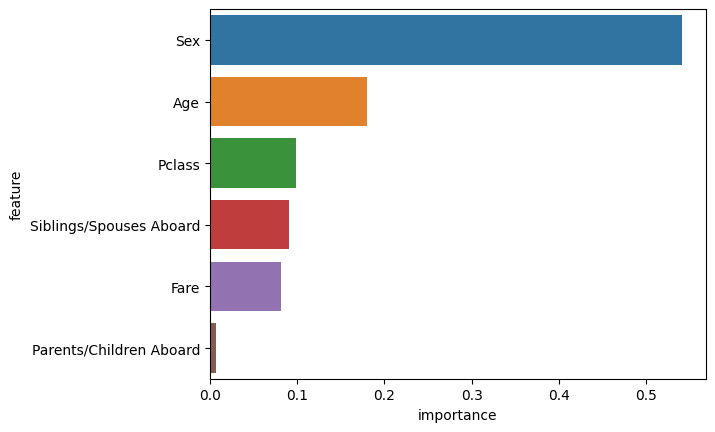

In [8]:
sns.barplot(data=df_tree_imp, y="feature", x="importance", orient="h")

In [9]:
fig = px.bar(df_tree_imp, x='feature', y='importance', color='importance', range_color=[0,1])
fig.show()

In [10]:
#Random forest
clf_rf = RandomForestClassifier(n_estimators=40, random_state=0, criterion="entropy",  max_depth=5)
clf_rf = clf_rf.fit(X_train, y_train.ravel())
print("Accuracy:",clf_rf.score(X_test, y_test))

Accuracy: 0.8054607508532423


In [11]:
clf_rf.feature_importances_

array([0.11752709, 0.44473593, 0.15318524, 0.04861536, 0.0396993 ,
       0.19623708])

In [12]:
imp = zip(features, clf_rf.feature_importances_)
df_rf_imp = pd.DataFrame(imp, columns = ['feature', 'importance']).sort_values(axis=0, by='importance', ascending=False)
df_rf_imp

,feature,importance
1,Sex,0.444736
5,Fare,0.196237
2,Age,0.153185
0,Pclass,0.117527
3,Siblings/Spouses Aboard,0.048615
4,Parents/Children Aboard,0.039699


<Axes: xlabel='importance', ylabel='feature'>

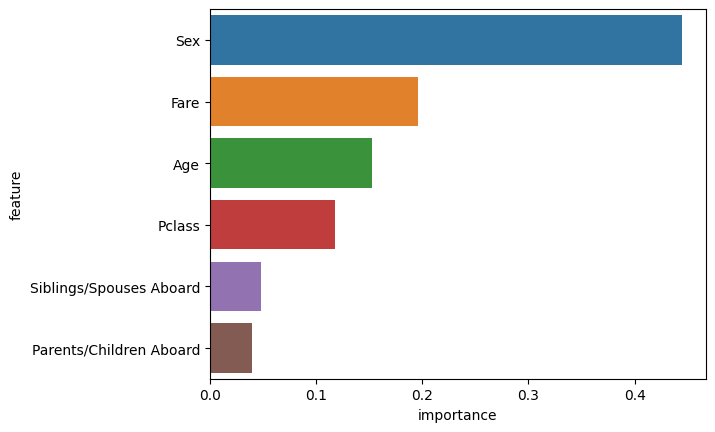

In [13]:
sns.barplot(data=df_rf_imp, y="feature", x="importance", orient="h")

In [14]:
fig = px.bar(df_rf_imp, x='feature', y='importance', color='importance', range_color=[0,1])
fig.show()

In [15]:
#logistic regression
clf_logreg = LogisticRegression(max_iter=300)
clf_logreg.fit(X_train, y_train.ravel())

print("Accuracy:", clf_logreg.score(X_test,y_test))

Accuracy: 0.7542662116040956


In [16]:
clf_logreg.coef_

array([[-1.03960112, -2.7177502 , -0.04431671, -0.38350361, -0.05292749,
         0.00402316]])

In [17]:
imp = zip(features, clf_logreg.coef_[0])
df_logreg_imp = pd.DataFrame(imp, columns = ['feature', 'importance']).sort_values(axis=0, by='importance', ascending=True)
df_logreg_imp

,feature,importance
1,Sex,-2.717750
0,Pclass,-1.039601
3,Siblings/Spouses Aboard,-0.383504
4,Parents/Children Aboard,-0.052927
2,Age,-0.044317
5,Fare,0.004023


<Axes: xlabel='importance', ylabel='feature'>

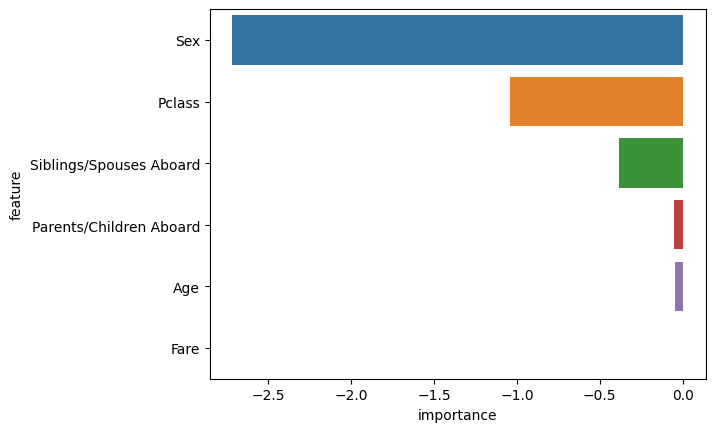

In [18]:
sns.barplot(data=df_logreg_imp, y="feature", x="importance", orient="h")

In [19]:
fig = px.bar(df_logreg_imp, x='feature', y='importance', color='importance')
fig.show()

**Permutation Feature Importance**

In [20]:
#MLPClassifier
#creating a neural network
clf_nn = MLPClassifier(
                    hidden_layer_sizes=(4,4),
                    activation='relu',
                    solver='lbfgs',
                    max_iter=1000,
                    alpha=0.001,
                    random_state=0)

clf_nn.fit(X_train, y_train.ravel())

print("Accuracy:", clf_nn.score(X_test,y_test))

Accuracy: 0.8088737201365188


In [21]:
imp_nn = permutation_importance(clf_nn, X_train, y_train, scoring='accuracy', n_repeats=10)
imp_nn

{'importances_mean': array([0.0026936 , 0.22744108, 0.07255892, 0.02929293, 0.03030303,
        0.02441077]),
 'importances_std': array([0.00399809, 0.00997253, 0.01052559, 0.00652886, 0.00432499,
        0.00639952]),
 'importances': array([[ 0.00673401,  0.00673401,  0.00505051, -0.0016835 , -0.003367  ,
          0.00505051, -0.0016835 ,  0.        ,  0.0016835 ,  0.00841751],
        [ 0.21212121,  0.24074074,  0.22053872,  0.24242424,  0.22558923,
          0.23063973,  0.21717172,  0.21717172,  0.23400673,  0.23400673],
        [ 0.07407407,  0.04713805,  0.08417508,  0.06060606,  0.07744108,
          0.07575758,  0.07912458,  0.07407407,  0.07070707,  0.08249158],
        [ 0.03535354,  0.03198653,  0.02356902,  0.02861953,  0.03198653,
          0.04040404,  0.03198653,  0.02693603,  0.02693603,  0.01515152],
        [ 0.03703704,  0.03872054,  0.02861953,  0.03030303,  0.02693603,
          0.03030303,  0.03030303,  0.02356902,  0.03030303,  0.02693603],
        [ 0.02356902,

In [22]:
imp = zip(features, imp_nn.importances_mean)
df_nn_imp = pd.DataFrame(imp, columns = ['feature', 'importance']).sort_values(axis=0, by='importance', ascending=False)
df_nn_imp

,feature,importance
1,Sex,0.227441
2,Age,0.072559
4,Parents/Children Aboard,0.030303
3,Siblings/Spouses Aboard,0.029293
5,Fare,0.024411
0,Pclass,0.002694


<Axes: xlabel='importance', ylabel='feature'>

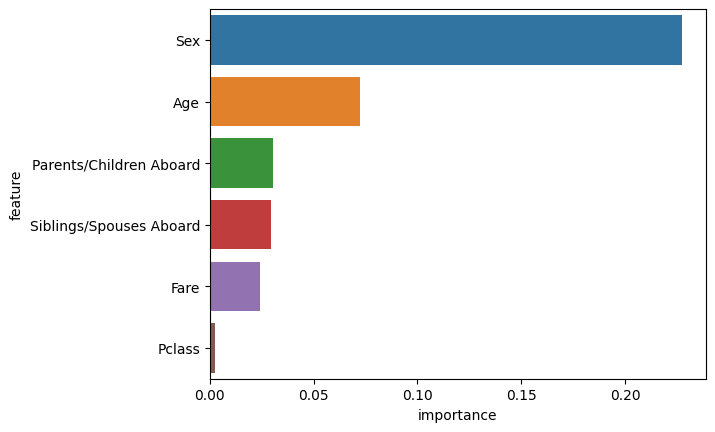

In [23]:
sns.barplot(data=df_nn_imp, y="feature", x="importance", orient="h")

In [24]:
fig = px.bar(df_nn_imp, x='feature', y='importance', color='importance', range_color=[0,1])
fig.show()

In [25]:
#kNN classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_scaled, y_train.ravel())

print("Accuracy:", clf_knn.score(X_test_scaled,y_test))

Accuracy: 0.7986348122866894


In [26]:
imp_knn = permutation_importance(clf_knn, X_train_scaled, y_train, scoring='accuracy', n_repeats=10)

imp = zip(features, imp_knn.importances_mean)
df_knn_imp = pd.DataFrame(imp, columns = ['feature', 'importance']).sort_values(axis=0, by='importance', ascending=False)
df_knn_imp

,feature,importance
1,Sex,0.228956
0,Pclass,0.129798
2,Age,0.080976
5,Fare,0.042929
3,Siblings/Spouses Aboard,0.037879
4,Parents/Children Aboard,0.032997


<Axes: xlabel='importance', ylabel='feature'>

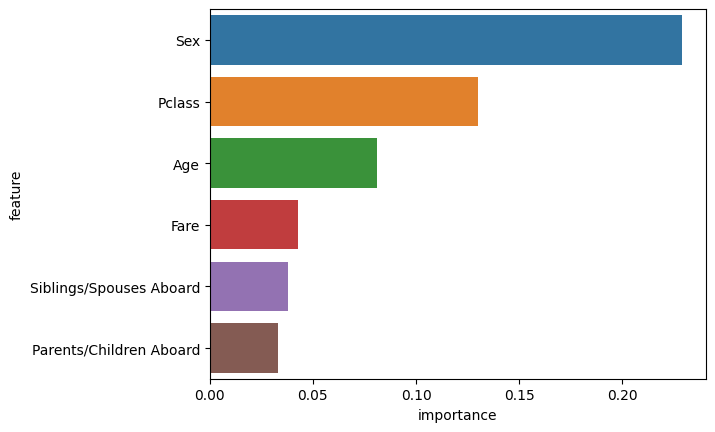

In [27]:
sns.barplot(data=df_knn_imp, y="feature", x="importance", orient="h")

In [28]:
fig = px.bar(df_knn_imp, x='feature', y='importance', color='importance', range_color=[0,1])
fig.show()

In [29]:
# Random Forest with Permutation Importance
print("Accuracy:",clf_rf.score(X_test, y_test))
df_rf_imp

Accuracy: 0.8054607508532423


,feature,importance
1,Sex,0.444736
5,Fare,0.196237
2,Age,0.153185
0,Pclass,0.117527
3,Siblings/Spouses Aboard,0.048615
4,Parents/Children Aboard,0.039699


<Axes: xlabel='importance', ylabel='feature'>

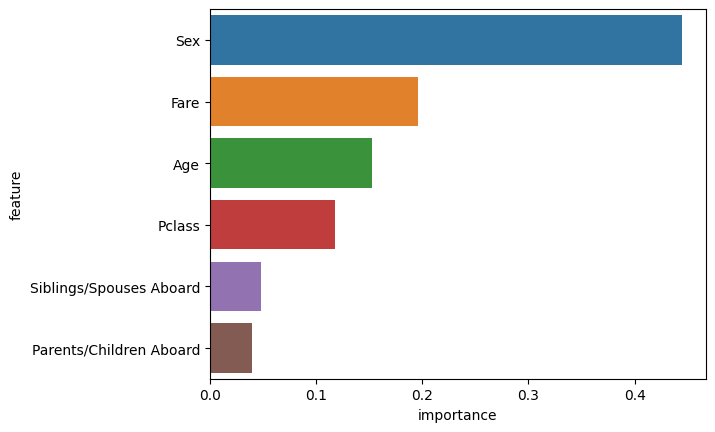

In [30]:
sns.barplot(data=df_rf_imp, y="feature", x="importance", orient="h")

In [31]:
imp_rf2 = permutation_importance(clf_rf, X_train, y_train, scoring='accuracy', n_repeats=10)

imp = zip(features, imp_rf2.importances_mean)
df_rf_imp2 = pd.DataFrame(imp, columns = ['feature', 'importance']).sort_values(axis=0, by='importance', ascending=False)
df_rf_imp2

,feature,importance
1,Sex,0.259596
2,Age,0.050842
0,Pclass,0.023569
4,Parents/Children Aboard,0.017172
5,Fare,0.013636
3,Siblings/Spouses Aboard,0.011279


<Axes: xlabel='importance', ylabel='feature'>

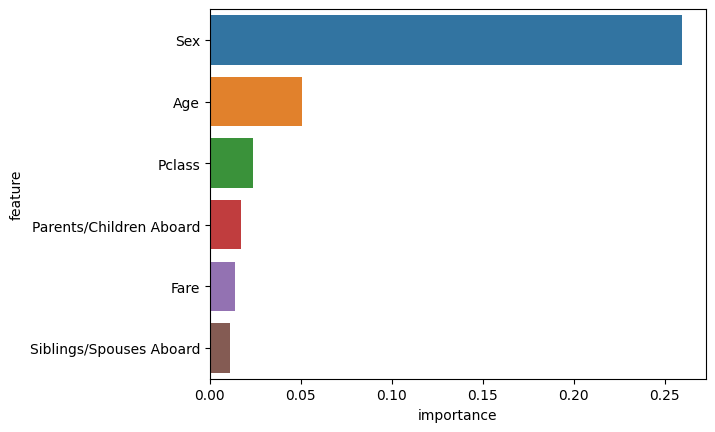

In [32]:
sns.barplot(data=df_rf_imp2, y="feature", x="importance", orient="h")

**Feature selection**

In [33]:
# Logistic regression fitting and feature importance extraction
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train.ravel())

print("Accuracy:", clf_logreg.score(X_test,y_test))

imp = zip(features, clf_lr.coef_[0])
df_lr_imp = pd.DataFrame(imp, columns = ['feature', 'importance']).sort_values(axis=0, by='importance', ascending=True)
df_lr_imp

Accuracy: 0.7542662116040956


,feature,importance
1,Sex,-2.717750
0,Pclass,-1.039601
3,Siblings/Spouses Aboard,-0.383504
4,Parents/Children Aboard,-0.052927
2,Age,-0.044317
5,Fare,0.004023


<Axes: xlabel='importance', ylabel='feature'>

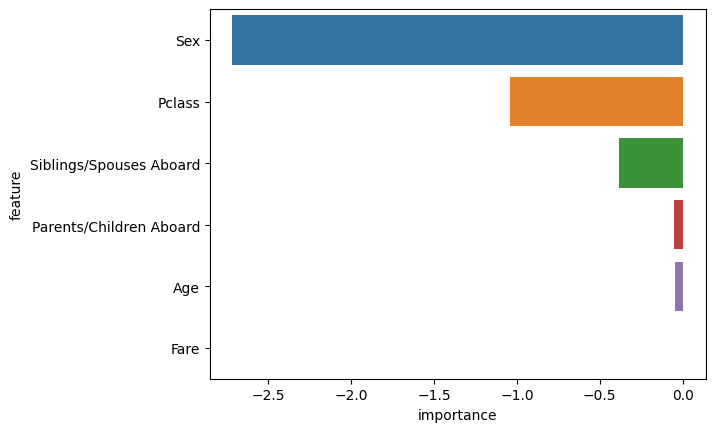

In [34]:
sns.barplot(data=df_lr_imp, y="feature", x="importance", orient="h")

In [35]:
#Wrapper
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(clf_lr,
          k_features = 'best',
          forward = True,
          floating = False,
          scoring = 'accuracy',
          cv = 10,  # crossvalidation
          n_jobs = -1)
sfs = sfs.fit(X_train, y_train)

print('Sequential forward selection (%i features): ' % np.size(sfs.k_feature_idx_))
print('Selected features indexes: ', sfs.k_feature_idx_)
print('CV score: ', sfs.k_score_)

Sequential forward selection (4 features): 
Selected features indexes:  (0, 1, 2, 5)
CV score:  0.818135593220339


In [36]:
#backward selection
sfs2 = SFS(clf_lr,
          k_features = 'best',
          forward = False,
          floating = False,
          scoring = 'accuracy',
          cv = 10,
          n_jobs = -1)
sfs2 = sfs2.fit(X_train, y_train.ravel())

print('Sequential backward selection (%i features): ' % np.size(sfs2.k_feature_idx_))
print('Selected features indexes: ', sfs2.k_feature_idx_)
print('CV score: ', sfs2.k_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Sequential backward selection (5 features): 
Selected features indexes:  (0, 1, 2, 3, 4)
CV score:  0.8132203389830508


In [37]:
#other forward selection
from sklearn.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(clf_lr,
          n_features_to_select = 'auto',
          tol = 0.01,
          direction = 'forward',
          scoring = 'accuracy',
          cv = 10,
          n_jobs = -1)
sfs = sfs.fit(X_train, y_train)

print('No of selected features: ', sfs.n_features_to_select_)

No of selected features:  1
